In [3]:
############### LOADING DATA ###############

%run '/home/christianl/Zhang-Lab/Zhang Lab Code/Boilerplate_datahandling/Remote boilerplate/model_load.py'

Loading pre-computed predictions...
✓ Loaded predictions for 3 models
  Training samples: 12748, Genes: 16100
  Test samples: 3187, Genes: 16100

✓ All functions loaded. Ready for analysis!


In [1]:
############### LOADING FUNCTIONS ###############

%run '/home/christianl/Zhang-Lab/Zhang Lab Code/Boilerplate_datahandling/Remote boilerplate/figure1_agg_pearson_R.py'

In [ ]:
############### UNIT TEST ###############

# Check what your y_test columns actually are:
print("y_test columns type:", type(y_train.columns))
print("First 5 column names:", y_train.columns[:5].tolist())

# Also check if y_test is actually a DataFrame or numpy array:
print("y_test type:", type(y_train))

In [ ]:
############### DIAGNOSTICS ###############

# diagnostics of MLR r2 scores for fitting to training set 

# checking to ensure predictions and groundtruth are comparable (they do)
assert y_train.shape == mlr_y_pred_train.shape

# compare r2 values
# mlr_loaded.score: 0.9041830139739396 on training data (fit)
print("mlr_loaded.score:", mlr_loaded.score(x_train, y_train))

# compute_metrics() is the flattened r2, where each gene's r2 is treated equally (flattened) before aggregating
# compute_metrics r2: 0.966425772252575
# compute_metrics Pearson_r: 0.9830695663342065

metrics_flat_mlr_train = compute_metrics(y_train.values, mlr_y_pred_train)

mlr_train_agg_R2 = metrics_flat_mlr_train['r2']
mlr_train_agg_Pearsons = metrics_flat_mlr_train['pearson_r']

print(f"compute global R²: {mlr_train_agg_R2}")
print(f"compute global Pearson's R: {mlr_train_agg_Pearsons}")

# compute_metrics_per_gene() looks at the indiviudal r2 at per-gene resolution (using DFs to maintain biological relevance of each column) 

#compute_metrics_per_gene R²: 0        0.920598
#1        0.883302
#2        0.650227
#3        0.872502
#4        0.953659
#           ...   
#16095    0.886189
#16096    0.950355
#16097    0.966280
#16098    0.961176
#16099    0.958689
#Name: r2, Length: 16100, dtype: float64

#computer_metrics_per_gene Pearson's R 0        0.959478
#1        0.939842
#2        0.806367
#3        0.934078
#4        0.976555
#           ...   
#16095    0.941376
#16096    0.974861
#16097    0.982995
#16098    0.980396
#16099    0.979127
#Name: pearson_r, Length: 16100, dtype: float64

metrics_flat_per_gene_mlr_train = compute_metrics_per_gene(y_train, mlr_y_pred_train)

mlr_train_pergene_R2 = metrics_flat_per_gene_mlr_train['r2']
mlr_train_pergene_Pearsons = metrics_flat_per_gene_mlr_train['pearson_r']

print("compute_metrics_per_gene R²:", mlr_train_pergene_R2)
print("computer_metrics_per_gene Pearson's R", mlr_train_pergene_Pearsons)

In [ ]:
############### DIAGNOSTICS ###############

# same diagnostics for XGBRF.v3 (trained on same x_train)
# checking to ensure predictions and groundtruth are comparable
assert y_train.shape == xgbrf_y_pred_train.shape

# computing XGBRF metrics (aggregate and per gene (per model is this case))
# compute global R²: 0.9347856649287827
# compute global Pearson's R: 0.9669668218291075
metrics_flat_xgbrf_train = compute_metrics(y_train.values, xgbrf_y_pred_train)

xgbrf_train_agg_R2 = metrics_flat_xgbrf_train['r2']
xgbrf_train_agg_Pearsons = metrics_flat_xgbrf_train['pearson_r']

print(f"compute global R²: {xgbrf_train_agg_R2}")
print(f"compute global Pearson's R: {xgbrf_train_agg_Pearsons}")

#compute_metrics_per_gene R²: 0        0.842478
#1        0.858510
#2        0.636674
#3        0.772578
#4        0.891585
#           ...   
#16095    0.773693
#16096    0.868024
#16097    0.910289
#16098    0.902526
#16099    0.915816
#Name: r2, Length: 16100, dtype: float64

#computer_metrics_per_gene Pearson's R 0        0.918635
#1        0.927942
#2        0.801955
#3        0.881419
#4        0.944821
#           ...   
#16095    0.881782
#16096    0.932276
#16097    0.954410
#16098    0.950481
#16099    0.957509
#Name: pearson_r, Length: 16100, dtype: float64

metrics_flat_per_gene_xgbrf_train = compute_metrics_per_gene(y_train, xgbrf_y_pred_train)

xgbrf_train_pergene_R2 = metrics_flat_per_gene_xgbrf_train['r2']
xgbrf_train_pergene_Pearsons = metrics_flat_per_gene_xgbrf_train['pearson_r']

print("compute_metrics_per_gene R²:", xgbrf_train_pergene_R2)
print("computer_metrics_per_gene Pearson's R", xgbrf_train_pergene_Pearsons)


In [ ]:
############### DIAGNOSTICS ###############


# same diagnostics for RNN.v1 (used as a reference for data preprocessing of other models )
# checking to ensure predictions and groundtruth are comparable
assert y_train.shape == rnn_y_pred_train.shape

# computing RNN metrics (aggregate and per gene)
# compute global R²: 0.9347856649287827
# compute global Pearson's R: 0.9669668218291075
metrics_flat_rnn_train = compute_metrics(y_train.values, rnn_y_pred_train)

rnn_train_agg_R2 = metrics_flat_rnn_train['r2']
rnn_train_agg_Pearsons = metrics_flat_rnn_train['pearson_r']

print(f"compute global R²: {xgbrf_train_agg_R2}")
print(f"compute global Pearson's R: {xgbrf_train_agg_Pearsons}")

#compute_metrics_per_gene R²: 0        0.224471
#1       -0.057189
#2       -0.204377
#3        0.390087
#4        0.662030
#           ...   
#16095    0.342862
#16096    0.506315
#16097    0.650347
#16098    0.505688
#16099    0.612035
#Name: r2, Length: 16100, dtype: float64

#computer_metrics_per_gene Pearson's R 0        0.485774
#1       -0.149498
#2        0.232025
#3        0.626851
#4        0.824306
#           ...   
#16095    0.586376
#16096    0.713733
#16097    0.809349
#16098    0.734049
#16099    0.783338
#Name: pearson_r, Length: 16100, dtype: float64

metrics_flat_per_gene_rnn_train = compute_metrics_per_gene(y_train, rnn_y_pred_train)

rnn_train_pergene_R2 = metrics_flat_per_gene_rnn_train['r2']
rnn_train_pergene_Pearsons = metrics_flat_per_gene_rnn_train['pearson_r']

print("compute_metrics_per_gene R²:", rnn_train_pergene_R2)
print("computer_metrics_per_gene Pearson's R", rnn_train_pergene_Pearsons)


In [ ]:
############### UNIT TEST ###############

%run '/home/christianl/Zhang-Lab/Zhang Lab Code/Testing/test_bootstrapping.py'


Processing MLR
Dataset size: 205,242,800 observations (1.64 GB as float64)
Pearson's R: 0.983070
Computing analytical CI using Fisher Z-transformation...
  CI computed in <0.001s using 205,242,800 observations
MLR: Pearson's R = 0.9831 [0.9831, 0.9831], p < 0.001

Processing XGBRFRegressor
Dataset size: 205,242,800 observations (1.64 GB as float64)
Pearson's R: 0.966967
Computing analytical CI using Fisher Z-transformation...
  CI computed in <0.001s using 205,242,800 observations
XGBRFRegressor: Pearson's R = 0.9670 [0.9670, 0.9670], p < 0.001

Processing RNN
Dataset size: 205,242,800 observations (1.64 GB as float64)
Pearson's R: 0.856882
Computing analytical CI using Fisher Z-transformation...
  CI computed in <0.001s using 205,242,800 observations
RNN: Pearson's R = 0.8569 [0.8568, 0.8569], p < 0.001

Figure saved to /home/christianl/Zhang-Lab/Zhang Lab Data/Saved figures/Production_model_figures(x_train)


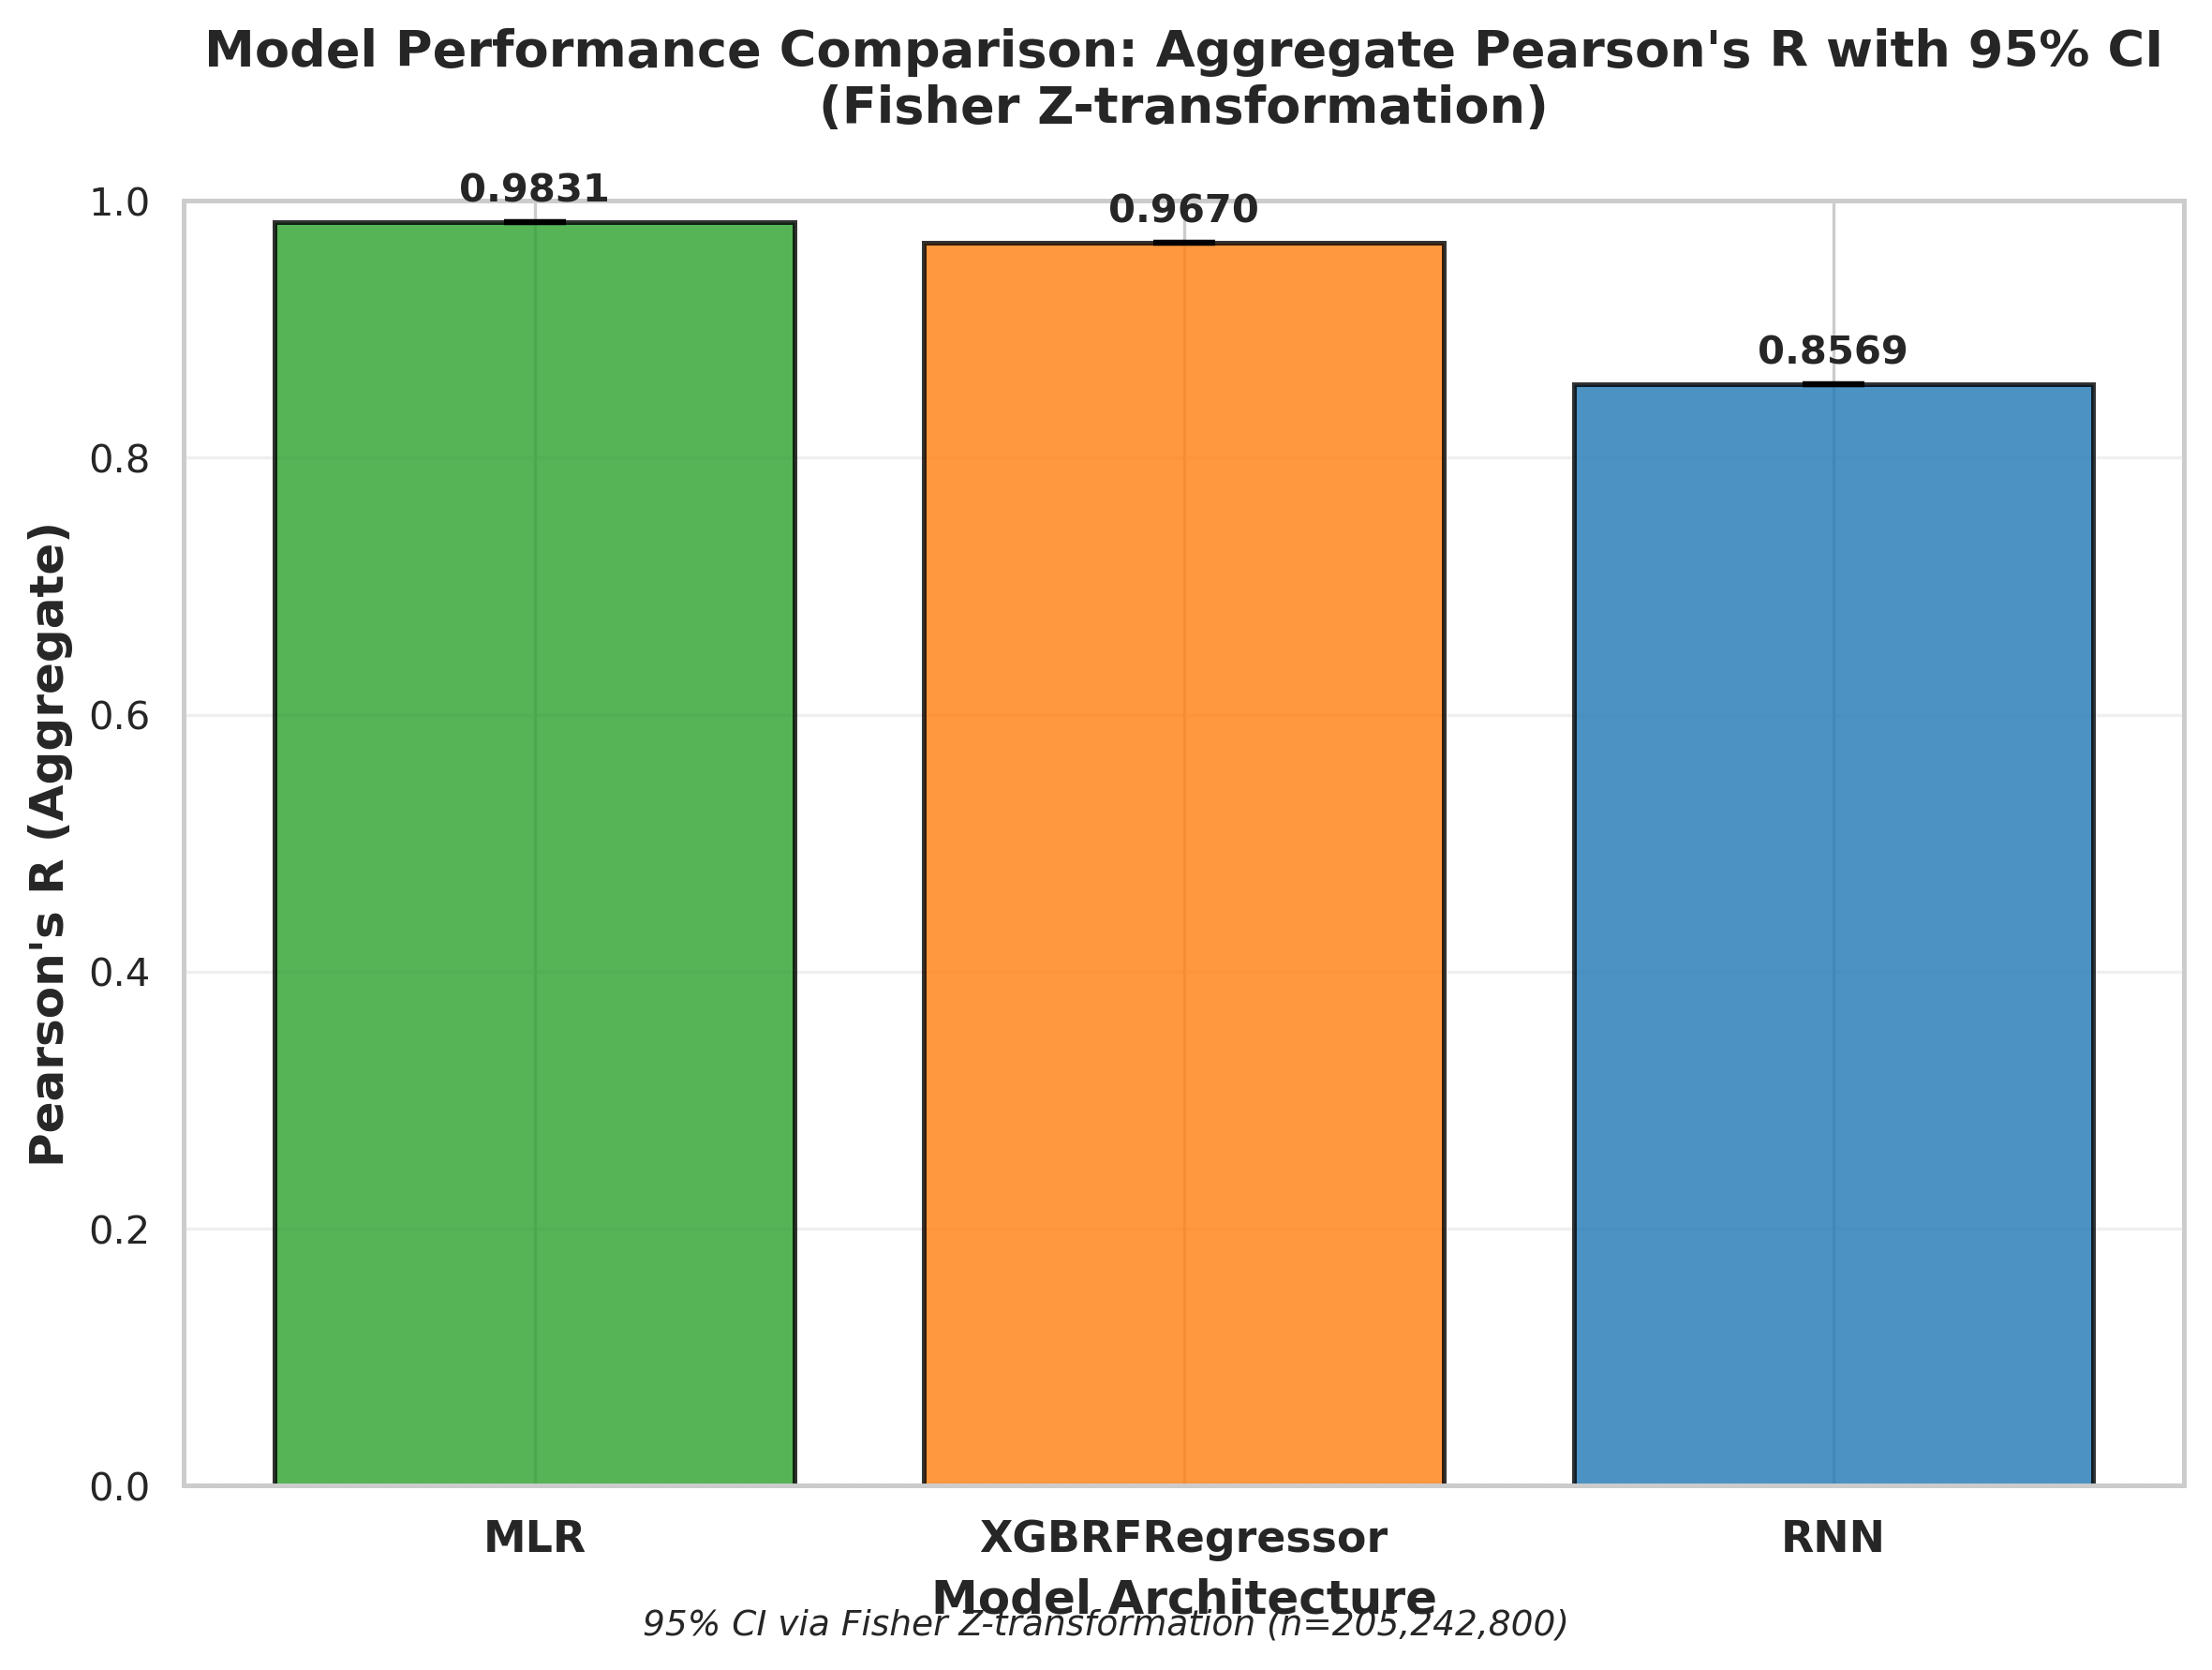

In [ ]:
############### PLOTTING STEP (AGG) ###############

agg_fit_metrics = figure_pearson_r_comparison_fast(
    y_true=y_train,
    predictions_dict=predictions_train, 
    ci_method='analytical', # uses Fisher Z transformation given use of Pearson's R (makes no difference) and large dataset, 
    #considered using Poisson Bootstrapping but given dataset size was computationally intensive for really small CI intervals that would ultimately end up identical to other strategies 
    n_bootstrap=5000, # worth lowering to 5000 55 minutes and not done at 10000 sampling runs 
    output_path='/home/christianl/Zhang-Lab/Zhang Lab Data/Saved figures/Production_model_figures(x_train)'
)

In [ ]:
############### PLOTTING STEP (PER-GENE) ###############

per_gene_fit_metrics = figure_per_gene_pearson_r_distribution(
    y_true=y_train,
    predictions_dict=predictions_train, 
    ci_method='analytical', # same as before 
    n_bootstrap=5000, # same as before
    output_path='/home/christianl/Zhang-Lab/Zhang Lab Data/Saved figures/figure2(fitting(PRODUCTION))-pergene(x_train)'
)